# Exploratory Data Analysis - RU

Посмотрим как данные кластеризуются. Скормим данные в PCA-трансформер и нарисуем 2d-диаграмму.

In [1]:
# Re-install pytables for hdf support (google colab has old & glitchy pytables)
#!pip uninstall -y tables
#!pip install tables

In [2]:
import pandas as pd
df = pd.read_hdf('fe1.h5')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227654 entries, 0 to 467481
Data columns (total 3 columns):
filename    227654 non-null object
text        227654 non-null object
lang        227654 non-null object
dtypes: object(3)
memory usage: 6.9+ MB


In [3]:
df.head()

,filename,text,lang
0,dataset/20191108/15/1491978796208217930.html,\n\n\n\n\n\n\n\n\n\n\n\nNewcastle United v Bou...,en
4,dataset/20191108/15/6359253557838878602.html,\n\n\n\n\n\n\n\n\n\n\n\nМинкомсвязь негативно ...,ru
6,dataset/20191108/15/8549607152500932485.html,\n\n\n\n\n\n\n\n\n\n\n\nTether Responds to Mar...,en
7,dataset/20191108/15/3752801377276103486.html,\n\n\n\n\n\n\n\n\n\n\n\nAnger over Las Vegas b...,en
10,dataset/20191108/15/5545714965965021212.html,\n\n\n\n\n\n\n\n\n\n\n\nAmerican Truck Simulat...,en


In [4]:
#!pip install nltk

In [5]:
import nltk
#nltk.download('stopwords', download_dir='nltk_data')
nltk.data.path.append('nltk_data')

In [6]:
from nltk.corpus import stopwords
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [7]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words=stopwords.words('russian'))
data = cv.fit_transform(df[df['lang'] == 'ru']['text'].values)

CPU times: user 30.2 s, sys: 1.86 s, total: 32 s
Wall time: 32 s


Количество признаков:

In [8]:
data.shape[1]

575438

## Principal Component Analysis

In [9]:
data

<120468x575438 sparse matrix of type '<class 'numpy.int64'>'
	with 17515691 stored elements in Compressed Sparse Row format>

In [10]:
%%time
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD()
pca.fit(data)

CPU times: user 11.3 s, sys: 8.76 s, total: 20 s
Wall time: 17.2 s


TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
             random_state=None, tol=0.0)

In [11]:
import matplotlib.pyplot as plt
plt.show() # init

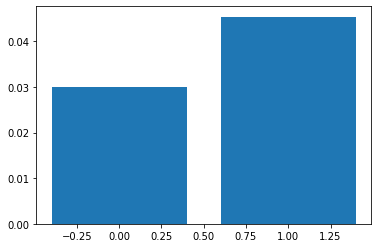

In [12]:
import numpy as np
plt.bar(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
plt.show()

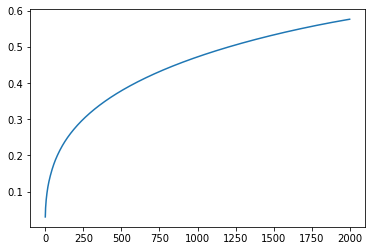

CPU times: user 39min 20s, sys: 7min 28s, total: 46min 49s
Wall time: 25min 45s


In [13]:
%%time
pca = TruncatedSVD(n_components=2000)
pca.fit(data)
plt.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
plt.show()